# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = '/content/formattedData.csv'
cars = pd.read_csv(url)
cars

,Year,Make,Model,Kilometres,Body_Type,Engine,Transmission,Drivetrain,Exterior_Colour,Interior_Colour,Passengers,Doors,Fuel_Type,City,Highway,Price
0,2014,Acura,RDX,290000,SUV,4,Automatic,AWD,Black,Black,5,5,Gas,11.336434,8.668992,11600
1,2014,Acura,RDX,158868,SUV,6,6 Speed Automatic,AWD,Silver,Black,5,5,Gas,10.700000,7.300000,17998
2,2016,Acura,MDX,226214,SUV,6,Automatic,AWD,White,Black,7,5,Gas,12.700000,9.100000,17999
3,2019,Acura,MDX,42081,SUV,6,9 Speed Automatic,AWD,White Diamond Pearl,Black,5,5,Gas,12.200000,9.000000,40588
4,2021,Acura,RDX,66960,SUV,4,10 Speed Automatic,AWD,Majestic Black Pearl,Black,5,5,Gas,11.000000,8.600000,41599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18642,2016,Volvo,XC90,145898,SUV,4,Automatic,AWD,Black,Brown,7,4,Gas,11.500000,9.500000,27998
18643,2015,Volvo,XC60,134000,SUV,4,Automatic,AWD,Black Stone,Black,5,4,Gas,13.000000,9.400000,18995
18644,2017,Volvo,XC90,67596,SUV,4,Automatic,AWD,White,Black,7,4,Gas,11.500000,9.600000,37990
18645,2018,Volvo,S90,74143,Sedan,4,Automatic,AWD,Onyx Black Metallic,Black,5,4,Gas,10.600000,7.600000,37980


# EDA

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18647 non-null  int64  
 1   Make             18647 non-null  object 
 2   Model            18647 non-null  object 
 3   Kilometres       18647 non-null  int64  
 4   Body_Type        18647 non-null  object 
 5   Engine           18647 non-null  object 
 6   Transmission     18647 non-null  object 
 7   Drivetrain       18647 non-null  object 
 8   Exterior_Colour  18647 non-null  object 
 9   Interior_Colour  18647 non-null  object 
 10  Passengers       18647 non-null  int64  
 11  Doors            18647 non-null  int64  
 12  Fuel_Type        18647 non-null  object 
 13  City             18647 non-null  float64
 14  Highway          18647 non-null  float64
 15  Price            18647 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 2.3+ MB


## Kesalahan Tipe Data

In [4]:
cars['Engine'] = cars['Engine'].replace('E', 0)

In [5]:
cars['Engine'] = cars['Engine'].astype(int)

In [6]:
print(cars['Engine'].unique())

[4 6 3 8 0]


In [7]:
cars.describe()

,Year,Kilometres,Engine,Passengers,Doors,City,Highway,Price
count,18647.000000,18647.000000,18647.000000,18647.000000,18647.000000,18647.000000,18647.000000,1.864700e+04
mean,2018.713466,65777.058454,4.869631,5.132139,3.737330,11.208847,8.401843,4.745054e+04
std,4.003967,63845.702800,1.476951,0.947128,0.731284,2.930360,2.094096,5.337145e+04
min,1958.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000e+03
25%,2017.000000,6779.000000,4.000000,5.000000,4.000000,9.300000,7.200000,2.488000e+04
50%,2019.000000,52600.000000,4.000000,5.000000,4.000000,11.200000,8.414118,3.699500e+04
75%,2022.000000,102501.000000,6.000000,5.000000,4.000000,12.900000,9.600000,5.797750e+04
max,2023.000000,480000.000000,8.000000,15.000000,5.000000,39.200000,42.800000,1.699998e+06


## Missing Value

In [8]:
zero_value = (cars == 0).sum()
zero_value

,0
Year,0
Make,0
Model,0
Kilometres,470
Body_Type,0
Engine,331
Transmission,0
Drivetrain,0
Exterior_Colour,0
Interior_Colour,0


In [9]:
cars[cars['Kilometres'] == 0]

,Year,Make,Model,Kilometres,Body_Type,Engine,Transmission,Drivetrain,Exterior_Colour,Interior_Colour,Passengers,Doors,Fuel_Type,City,Highway,Price
2685,2023,Buick,Encore,0,SUV,3,9 Speed Automatic,AWD,White Frost Tricoat,Beige,5,4,Gas,9.000000,8.300000,41623
2688,2022,Buick,Enclave,0,SUV,6,9 Speed Automatic,AWD,Ebony Twilight Metallic,Black,7,4,Gas,13.614286,9.414286,62950
2695,2023,Buick,Encore,0,SUV,6,9 Speed Automatic,AWD,Moonstone Grey Metallic,Black,5,4,Gas,9.000000,8.300000,35333
2795,2021,Cadillac,Escalade,0,SUV,8,Automatic,4x4,Black Raven,Black,7,4,Gas,16.800000,12.400000,164588
2848,2023,Cadillac,CT5-V,0,Sedan,8,10 Speed Automatic,RWD,Black Raven,Black,5,4,Gas,17.900000,11.000000,141975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,2023,Nissan,Rogue,0,SUV,3,CVT,AWD,BL,Charcoal,5,4,Gas,8.400000,6.700000,39103
18387,2023,Nissan,Rogue,0,SUV,3,CVT,AWD,BL,Charcoal,5,4,Gas,8.400000,6.700000,40652
18388,2023,Nissan,Rogue,0,SUV,3,CVT,AWD,Super Black,Charcoal,5,4,Gas,8.400000,6.700000,42817
18396,2023,Nissan,Rogue,0,SUV,3,CVT,AWD,Metallic,Charcoal,5,4,Gas,8.400000,6.800000,45903


In [10]:
cars.isna().sum()

,0
Year,0
Make,0
Model,0
Kilometres,0
Body_Type,0
Engine,0
Transmission,0
Drivetrain,0
Exterior_Colour,0
Interior_Colour,0


## Data Duplicate

In [11]:
duplicate_rows = cars[cars.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
       Year   Make Model  Kilometres Body_Type  Engine       Transmission  \
19     2023   Audi    Q5        6500       SUV       4          Automatic   
20     2023   Audi    Q8          90       SUV       6          Automatic   
25     2023   Audi    Q5          90       SUV       4          Automatic   
26     2023   Audi    Q5          90       SUV       4          Automatic   
27     2023   Audi    Q5          90       SUV       4          Automatic   
...     ...    ...   ...         ...       ...     ...                ...   
18641  2020  Volvo  XC40       47120       SUV       4  8 Speed Automatic   
18643  2015  Volvo  XC60      134000       SUV       4          Automatic   
18644  2017  Volvo  XC90       67596       SUV       4          Automatic   
18645  2018  Volvo   S90       74143     Sedan       4          Automatic   
18646  2012  Volvo   S60      145000     Sedan       4          Automatic   

      Drivetrain         Exterior_Colour Interior_Colour  P

In [12]:
cars = cars.drop_duplicates()

In [13]:
cars.shape

(15380, 16)

## Outliers

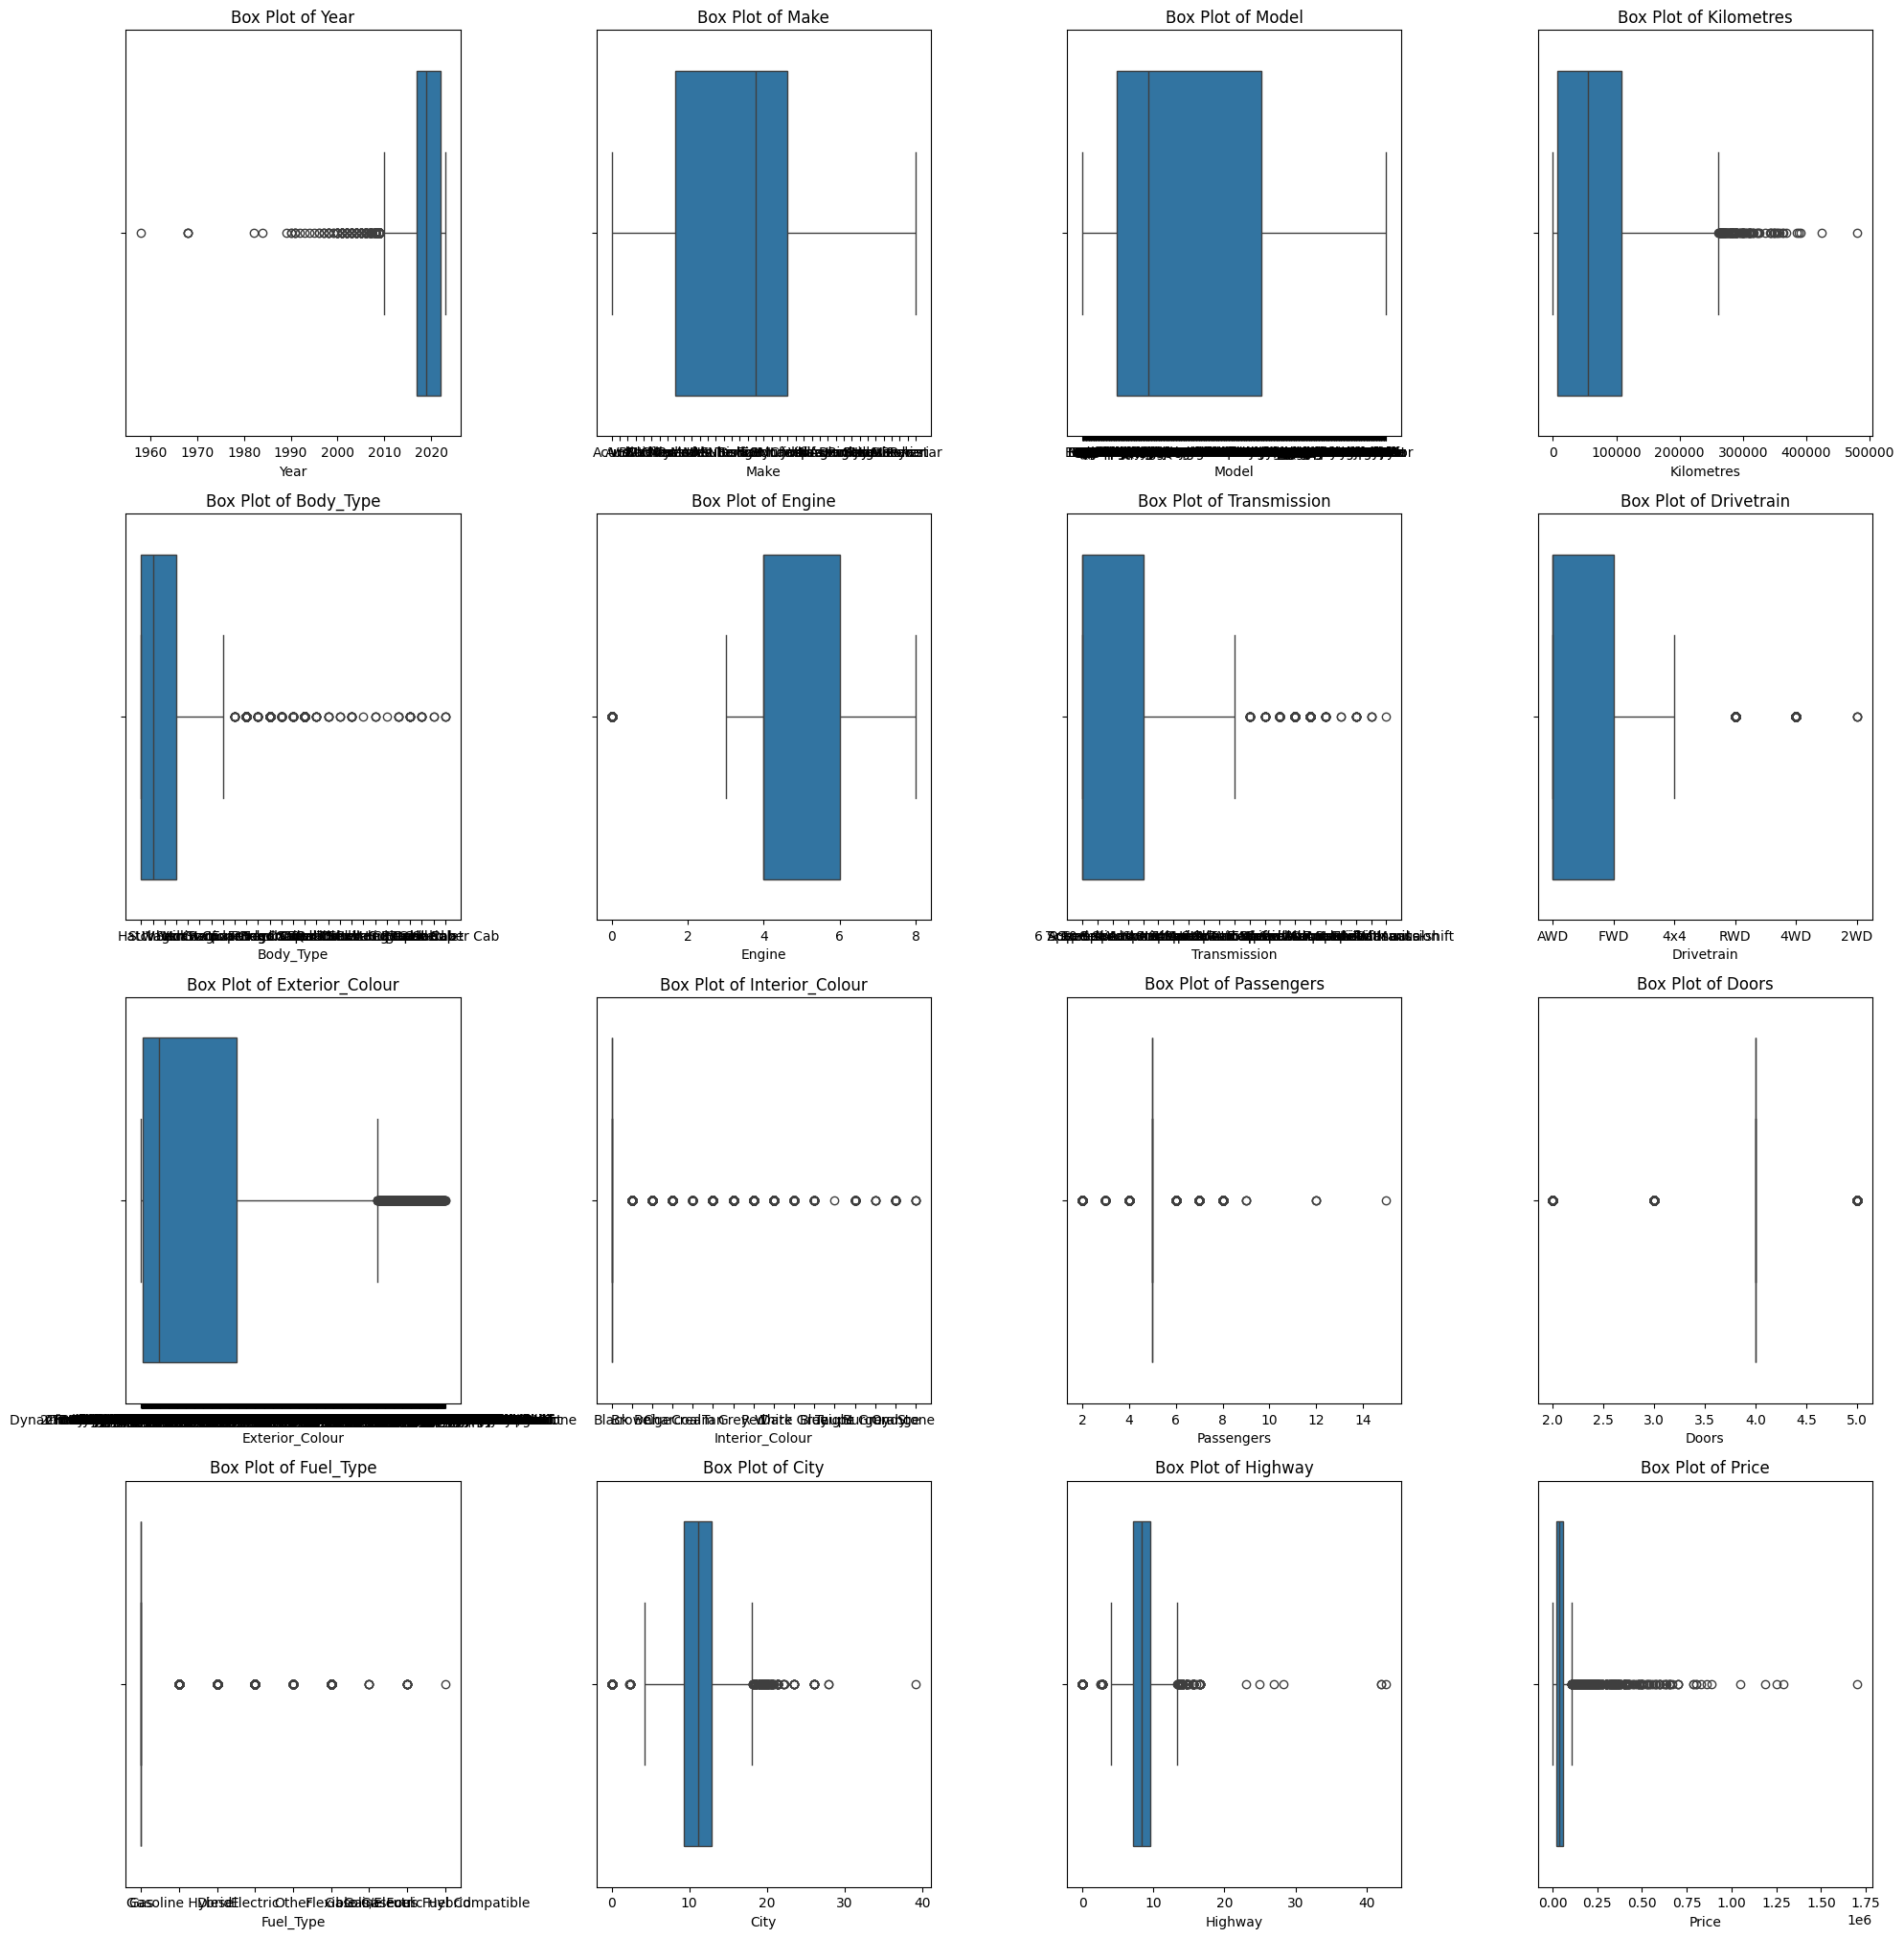

In [14]:
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

# Iterasi untuk membuat boxplot pada setiap kolom
for i, column in enumerate(cars.columns):
    row, col = divmod(i, cols)
    sns.boxplot(ax=axes[row, col], x=cars[column])
    axes[row, col].set_title(f'Box Plot of {column}')

# Menghapus subplot yang tidak terpakai jika jumlah kolom lebih sedikit daripada jumlah subplot
for j in range(len(cars.columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [15]:
cars_numerik = cars.select_dtypes(include=['number'])

Q1 = cars_numerik.quantile(0.25)
Q3 = cars_numerik.quantile(0.75)
IQR=Q3-Q1
cars=cars[~((cars_numerik<(Q1-1.5*IQR))|(cars_numerik>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
cars.shape

(9441, 16)

## Univariate Analysis

In [16]:
numerical_features = [
    'Year', 'Kilometres', 'Passengers', 'Doors', 'Engine',
    'City', 'Highway', 'Price'
]


categorical_features = [
    'Make', 'Model', 'Body_Type',
    'Transmission', 'Drivetrain', 'Exterior_Colour',
    'Interior_Colour', 'Fuel_Type'
]

### Categorical Features

               jumlah sampel  persentase
Make                                    
Hyundai                  972        10.3
Jeep                     958        10.1
Ford                     839         8.9
Honda                    796         8.4
Nissan                   692         7.3
BMW                      656         6.9
Audi                     546         5.8
Mazda                    543         5.8
Volkswagen               510         5.4
Mercedes-Benz            506         5.4
Chevrolet                377         4.0
Kia                      364         3.9
Porsche                  243         2.6
Subaru                   230         2.4
Infiniti                 201         2.1
GMC                      200         2.1
Acura                    179         1.9
Dodge                    118         1.2
Volvo                     92         1.0
Jaguar                    78         0.8
Cadillac                  74         0.8
Mitsubishi                60         0.6
Maserati        

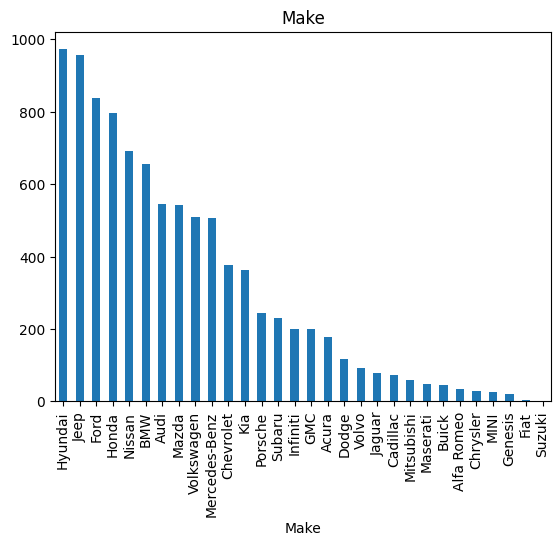

In [17]:
feature = categorical_features[0]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

          jumlah sampel  persentase
Model                              
Civic               372         3.9
Wrangler            364         3.9
Elantra             309         3.3
F-150               285         3.0
Grand               248         2.6
...                 ...         ...
Mirage                1         0.0
C63                   1         0.0
C450                  1         0.0
C400                  1         0.0
Wagoneer              1         0.0

[294 rows x 2 columns]


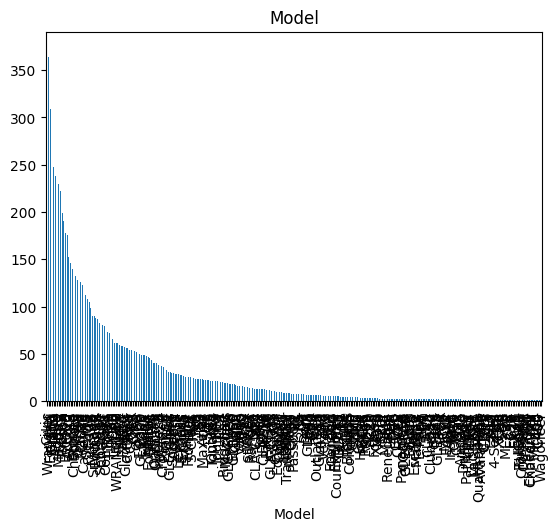

In [18]:
feature = categorical_features[1]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                       jumlah sampel  persentase
Body_Type                                       
SUV                             4930        52.2
Sedan                           3068        32.5
Hatchback                        526         5.6
Crew Cab                         331         3.5
Truck                            261         2.8
Wagon                            157         1.7
Compact                           54         0.6
Coupe                             40         0.4
Truck Crew Cab                    19         0.2
Regular Cab                       17         0.2
Extended Cab                       8         0.1
Station Wagon                      7         0.1
Convertible                        4         0.0
Super Crew                         4         0.0
Truck Double Cab                   3         0.0
Truck Extended Cab                 3         0.0
Truck Super Cab                    3         0.0
Minivan                            2         0.0
Truck Short Super Ca

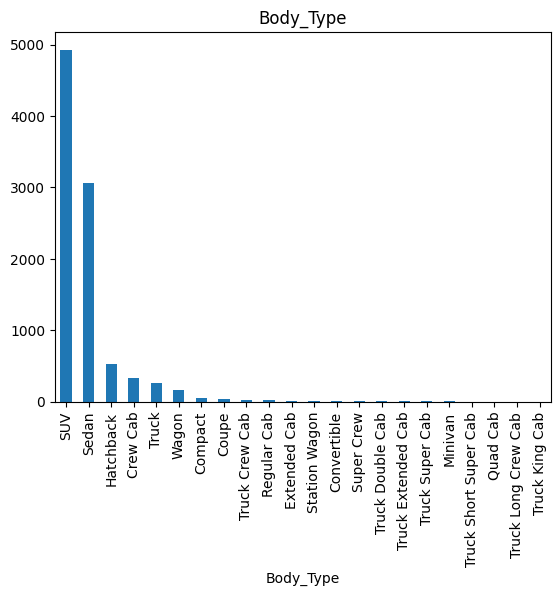

In [19]:
feature = categorical_features[2]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                                   jumlah sampel  persentase
Transmission                                                
Automatic                                   5040        53.4
8 Speed Automatic                           1339        14.2
CVT                                         1149        12.2
6 Speed Automatic                            827         8.8
7 Speed Automatic                            346         3.7
9 Speed Automatic                            220         2.3
Manual                                       160         1.7
6 Speed Manual                               116         1.2
10 Speed Automatic                            86         0.9
5 Speed Automatic                             49         0.5
7 Speed Automatic with auto-shift             29         0.3
4 Speed Automatic                             23         0.2
5 Speed Manual                                21         0.2
6 Speed Automatic with auto-shift             11         0.1
8 Speed Automatic with a

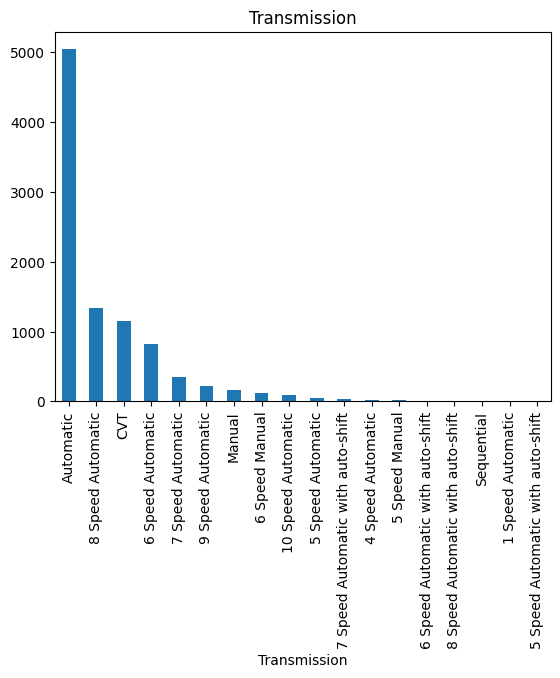

In [20]:
feature = categorical_features[3]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

            jumlah sampel  persentase
Drivetrain                           
AWD                  4780        50.6
FWD                  2835        30.0
4x4                  1148        12.2
4WD                   572         6.1
RWD                   104         1.1
2WD                     2         0.0


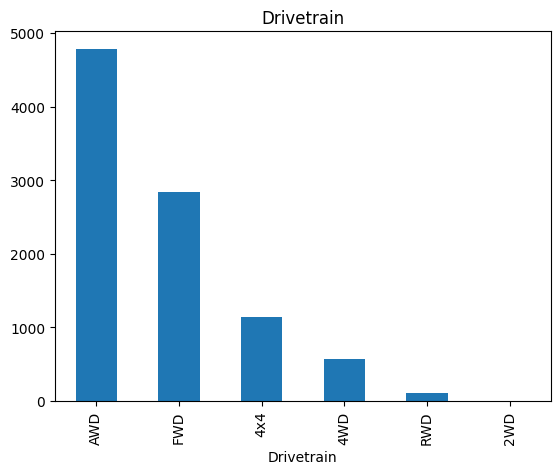

In [21]:
feature = categorical_features[4]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                       jumlah sampel  persentase
Exterior_Colour                                 
Black                           1028        10.9
White                            723         7.7
Grey                             436         4.6
Blue                             315         3.3
Bright White                     208         2.2
...                              ...         ...
Fiery Red Metallic                 1         0.0
Graphite Metallic                  1         0.0
RED/BURGUNDY                       1         0.0
Geranium Red Metallic              1         0.0
Pepper Gray Metallic               1         0.0

[889 rows x 2 columns]


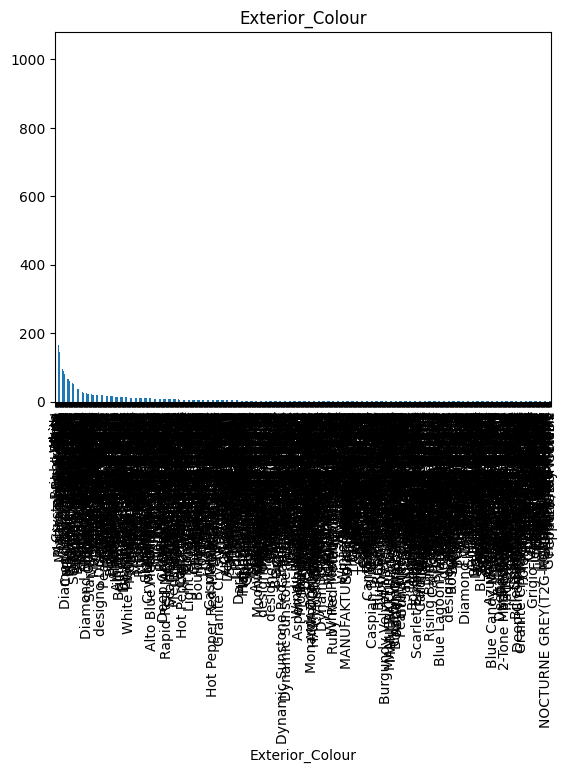

In [22]:
feature = categorical_features[5]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
Interior_Colour                           
Black                     7771        82.3
Grey                       442         4.7
Charcoal                   371         3.9
Red                        240         2.5
Brown                      182         1.9
Beige                      171         1.8
Tan                         96         1.0
White                       50         0.5
Dark Grey                   48         0.5
Cream                       24         0.3
Light Grey                  22         0.2
Blue                        14         0.1
Orange                       7         0.1
Stone                        2         0.0
Burgundy                     1         0.0


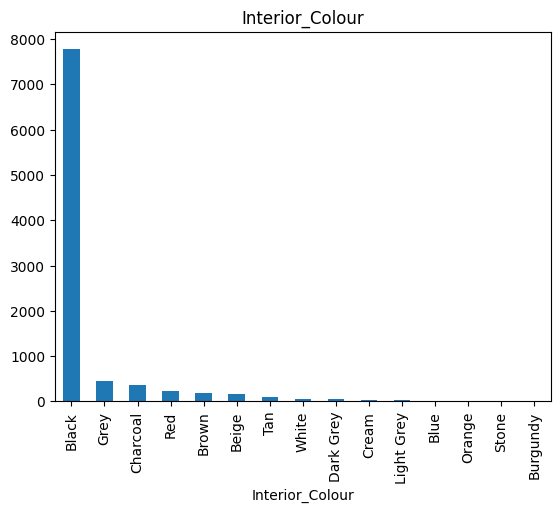

In [23]:
feature = categorical_features[6]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                         jumlah sampel  persentase
Fuel_Type                                         
Gas                               8770        92.9
Gasoline Hybrid                    312         3.3
Diesel                             202         2.1
Flexible                            82         0.9
Electric                            44         0.5
Other                               24         0.3
Gasoline Fuel                        4         0.0
Gas/Electric Hybrid                  2         0.0
Gaseous Fuel Compatible              1         0.0


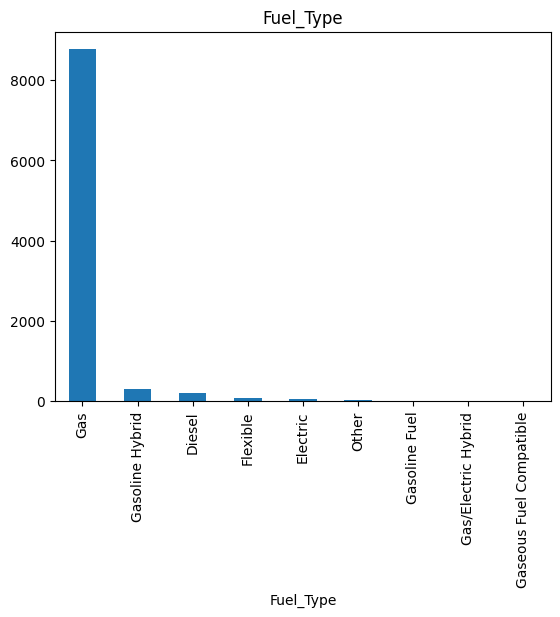

In [24]:
feature = categorical_features[7]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Numerical Features

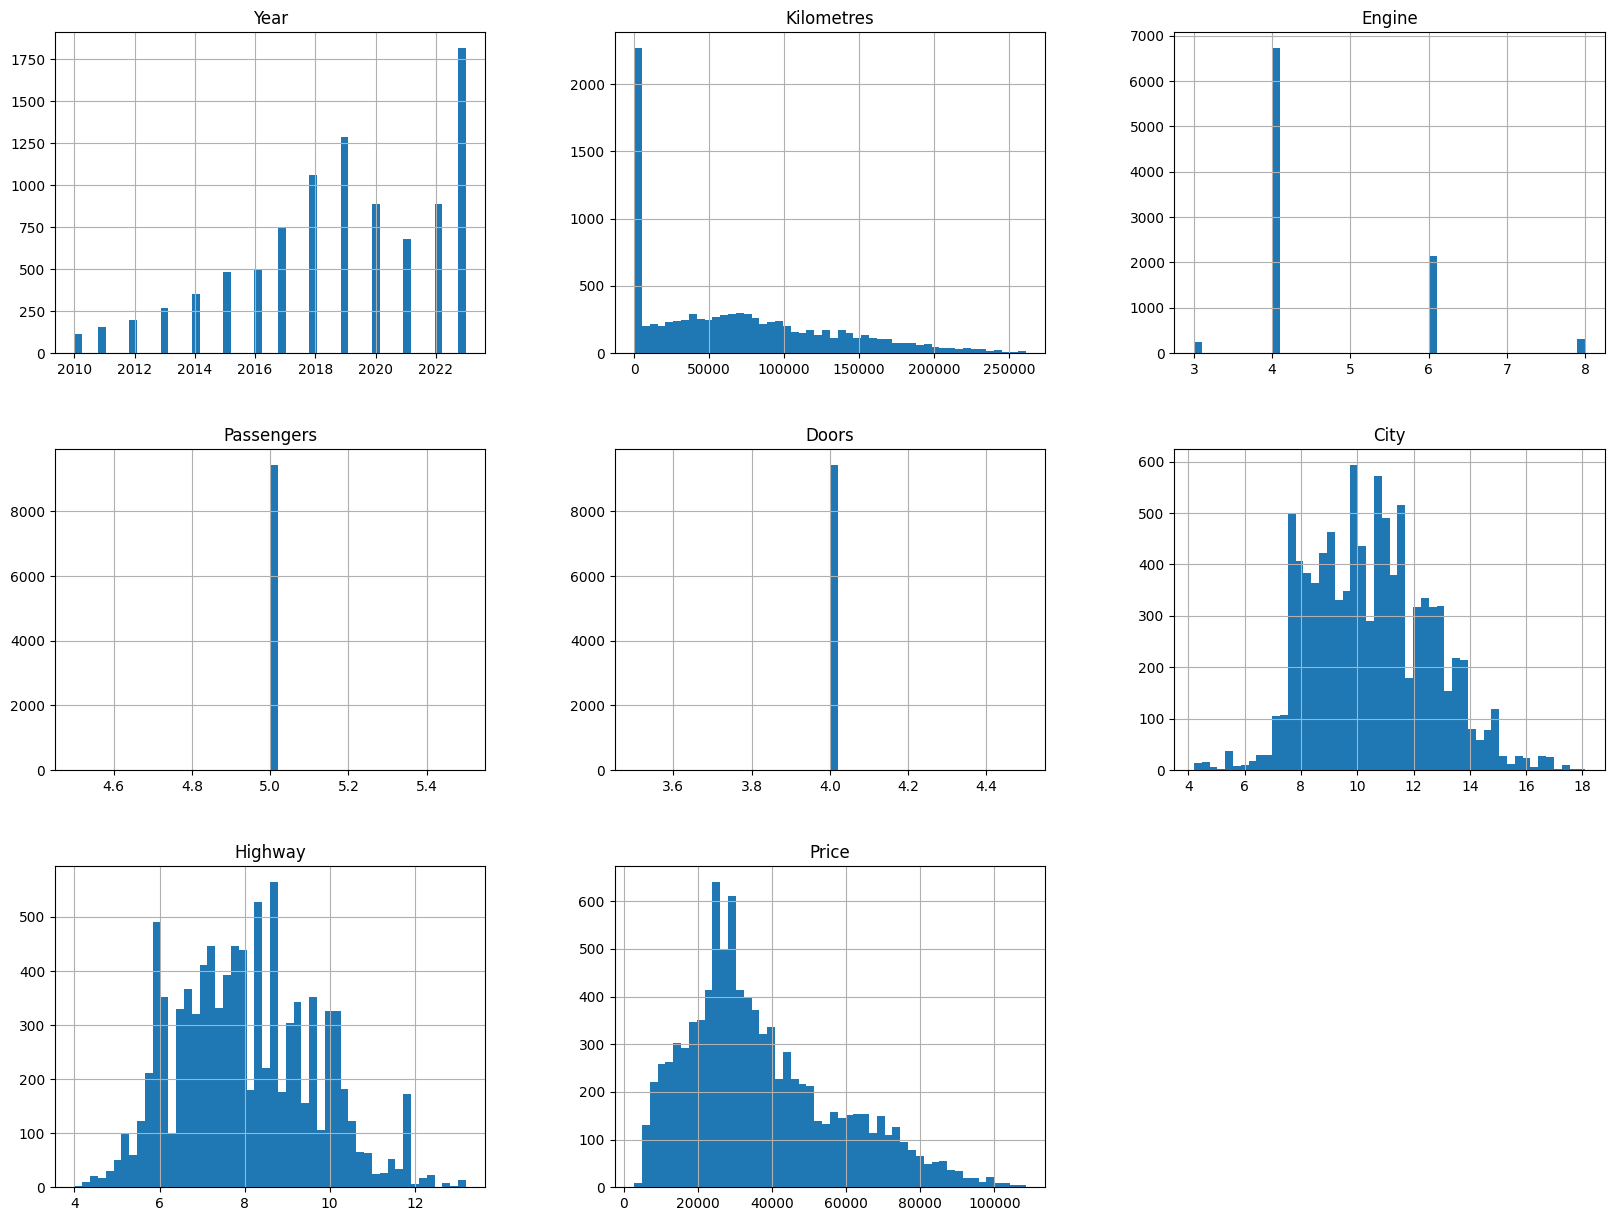

In [25]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Categorical Feature

<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-26-cb0bc21b3d74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is de

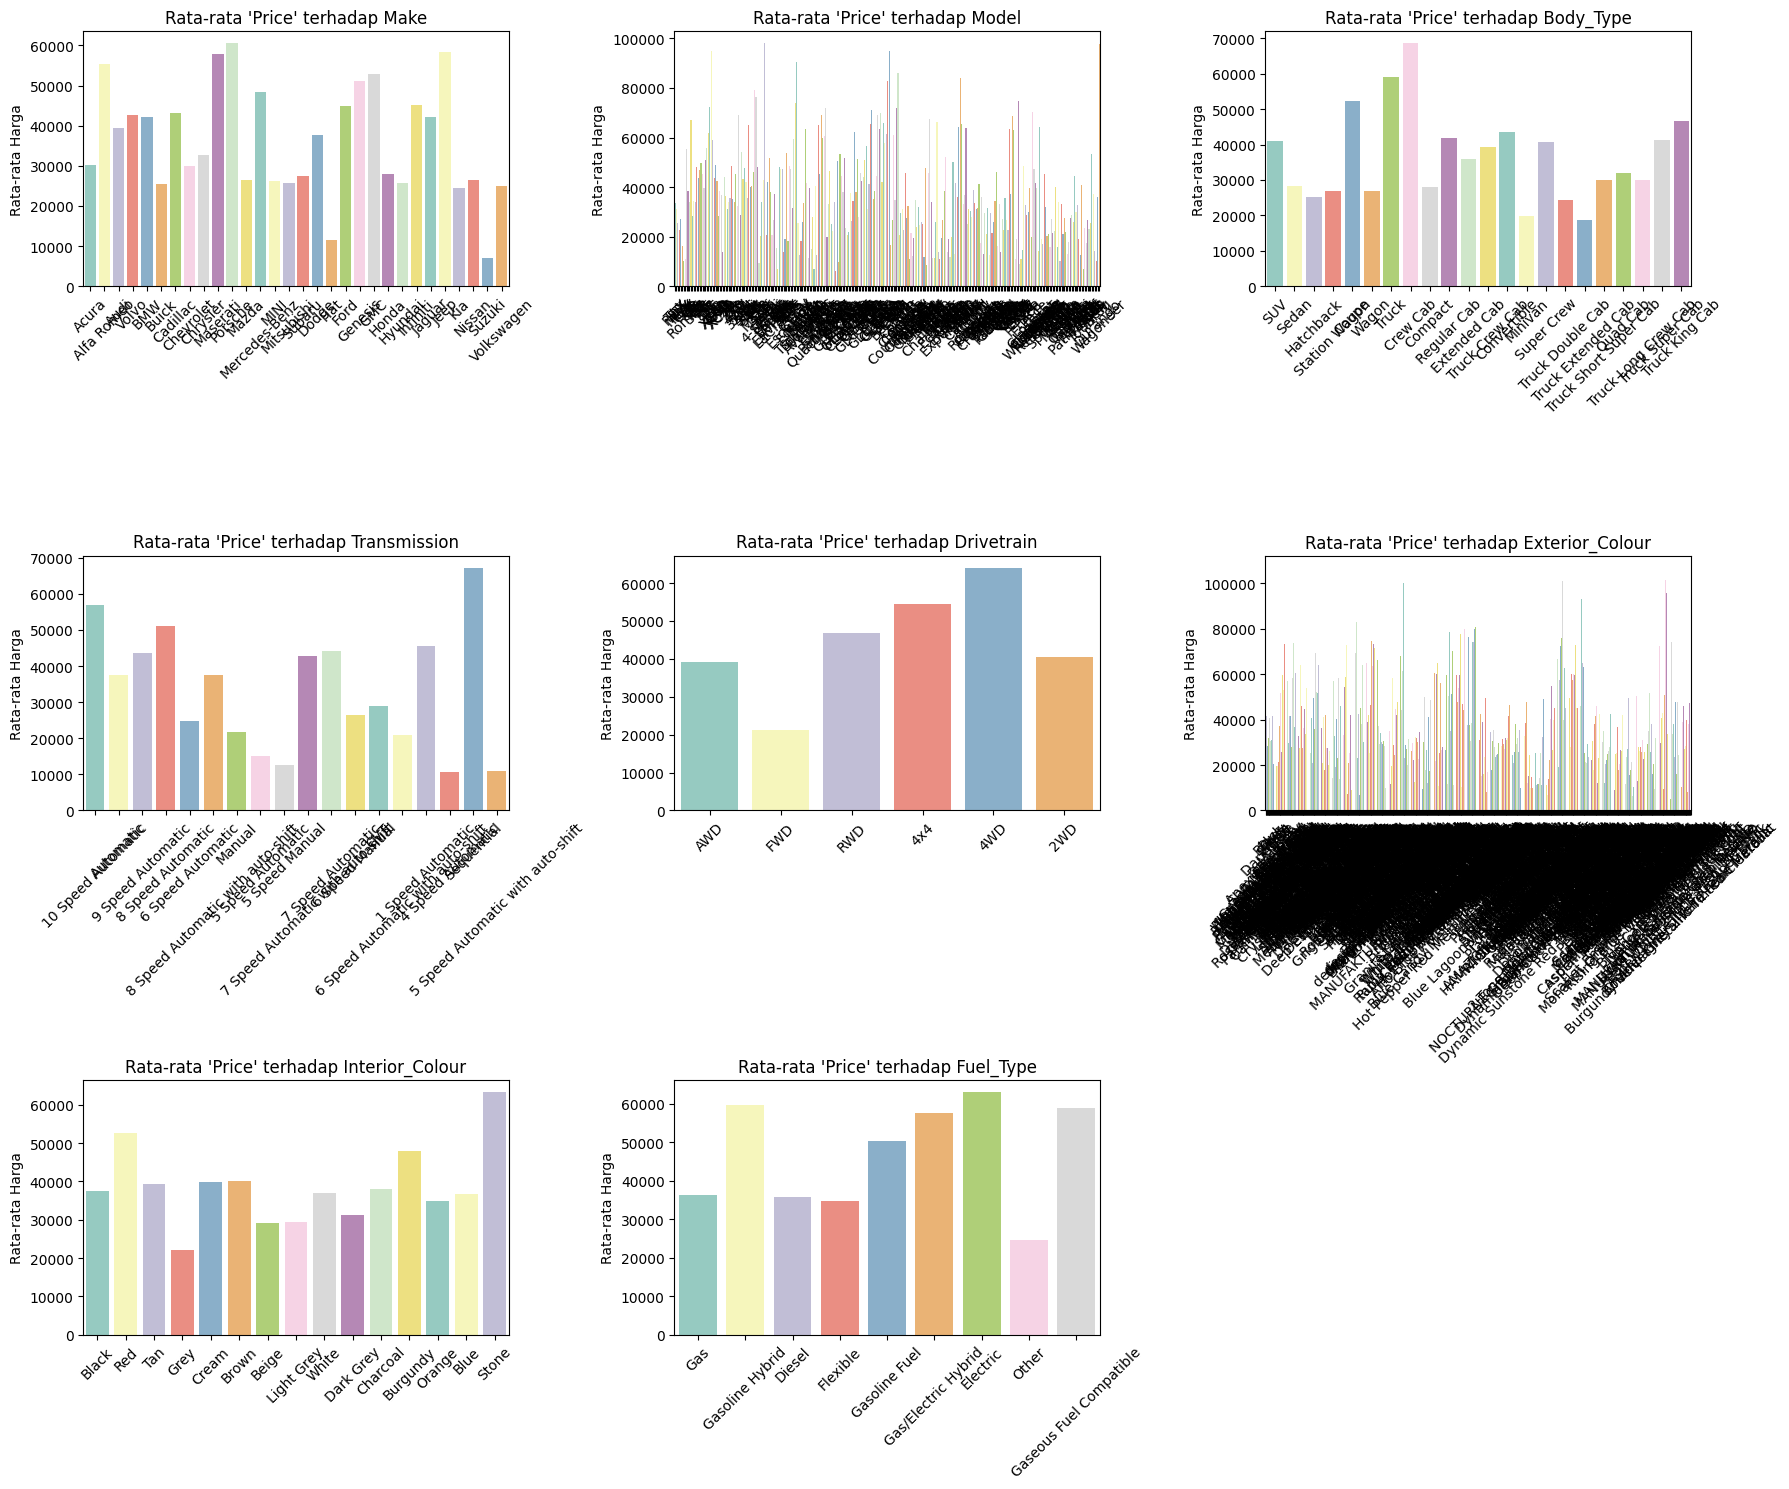

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan kolom kategorikal
cat_features = cars.select_dtypes(include='object').columns.to_list()

# Menentukan jumlah baris dan kolom secara dinamis
n_cols = 3  # Jumlah kolom dalam grid
n_rows = -(-len(cat_features) // n_cols)  # Hitung jumlah baris (ceiling division)

# Membuat grid subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Meratakan grid untuk iterasi

# Membuat plot untuk setiap kolom kategorikal
for i, col in enumerate(cat_features):
    sns.barplot(
        x=col,
        y="Price",
        data=cars,
        ax=axes[i],
        palette="Set3",
        ci=None  # Interval kepercayaan dihilangkan untuk kejelasan
    )
    axes[i].set_title(f"Rata-rata 'Price' terhadap {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Membuat label x miring
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Rata-rata Harga')

# Menghapus subplot kosong (jika ada)
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


### Numerical Features

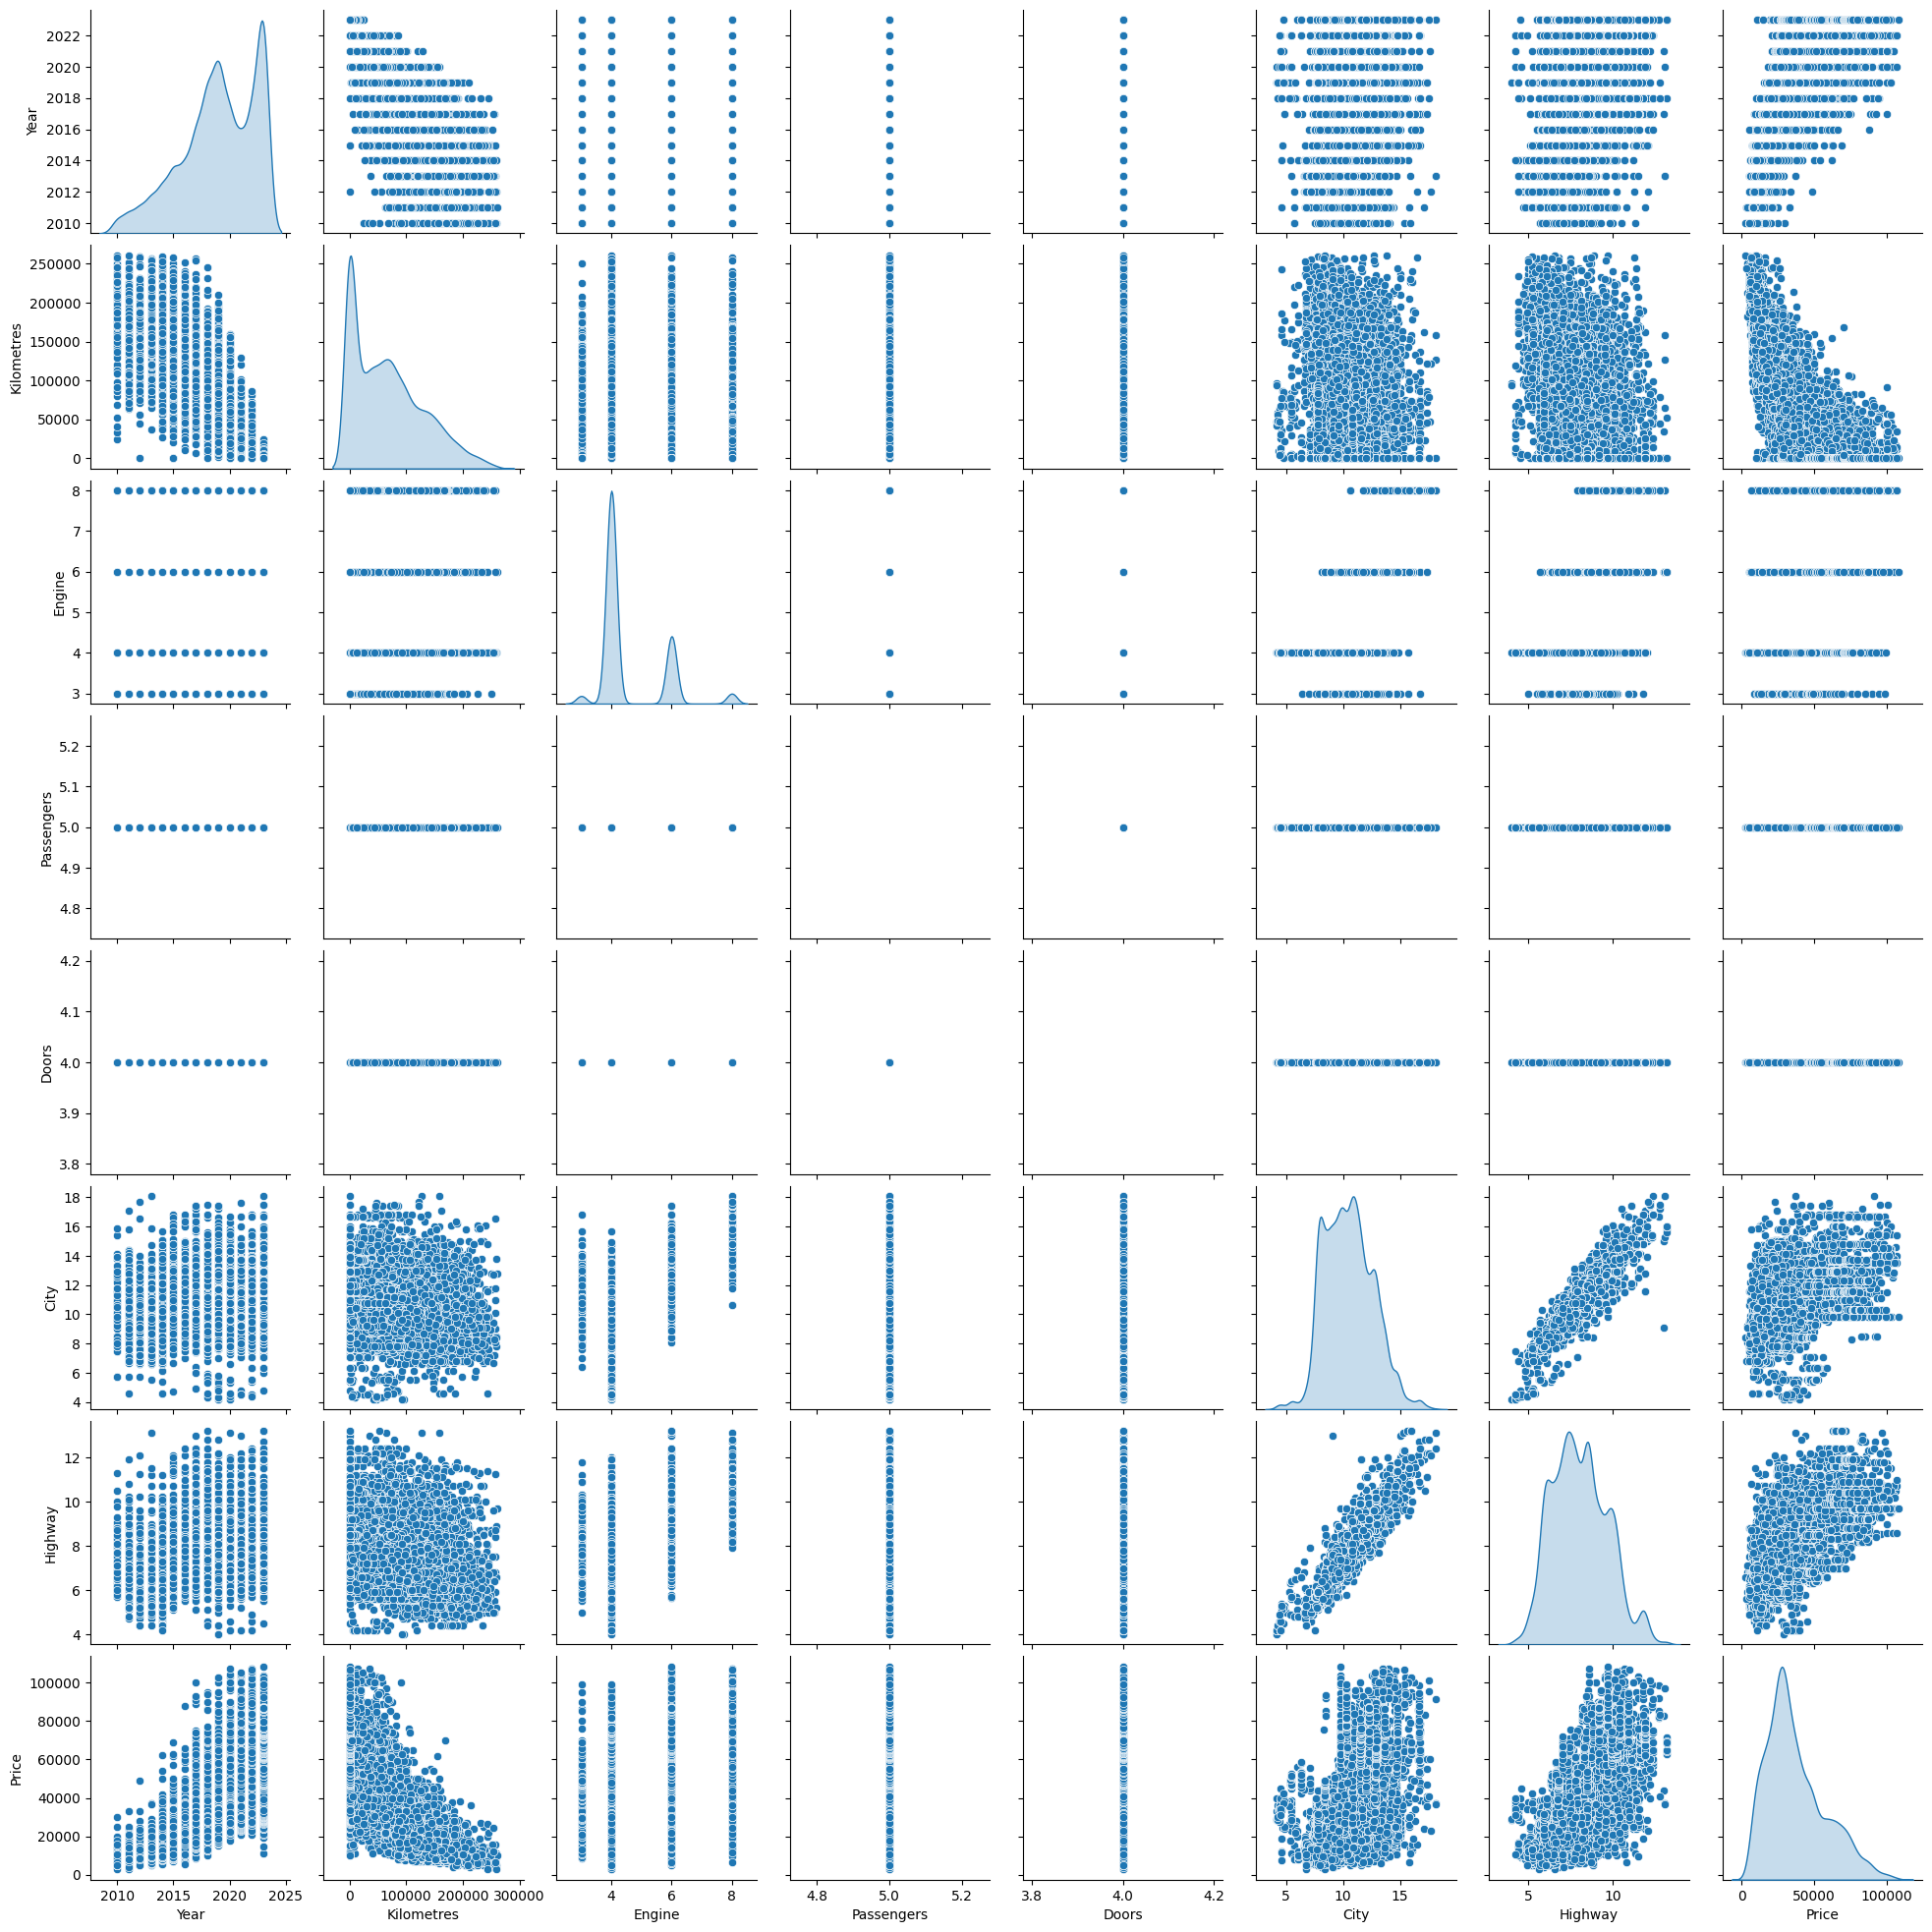

In [27]:
sns.pairplot(cars, diag_kind = 'kde')

In [28]:
print(cars[['Doors', 'Passengers']].describe())

        Doors  Passengers
count  9441.0      9441.0
mean      4.0         5.0
std       0.0         0.0
min       4.0         5.0
25%       4.0         5.0
50%       4.0         5.0
75%       4.0         5.0
max       4.0         5.0


In [29]:
cars = cars.drop(['Doors', 'Passengers'], axis=1)
cars.head()

,Year,Make,Model,Kilometres,Body_Type,Engine,Transmission,Drivetrain,Exterior_Colour,Interior_Colour,Fuel_Type,City,Highway,Price
586,2019,Acura,RDX,33032,SUV,4,10 Speed Automatic,AWD,White Diamond Pearl,Black,Gas,11.0,8.6,40888
587,2020,Acura,RDX,50702,SUV,4,10 Speed Automatic,AWD,Platinum White Pearl,Black,Gas,11.0,8.6,44599
588,2021,Acura,RDX,67950,SUV,4,Automatic,AWD,Apex Blue Pearl,Red,Gas,11.3,9.1,46989
590,2020,Acura,RDX,27800,SUV,4,10 Speed Automatic,AWD,Majestic Black Pearl,Black,Gas,11.3,9.1,49099
591,2019,Acura,TLX,34396,Sedan,6,9 Speed Automatic,AWD,Crystal Black Pearl,Tan,Gas,11.4,7.7,36499


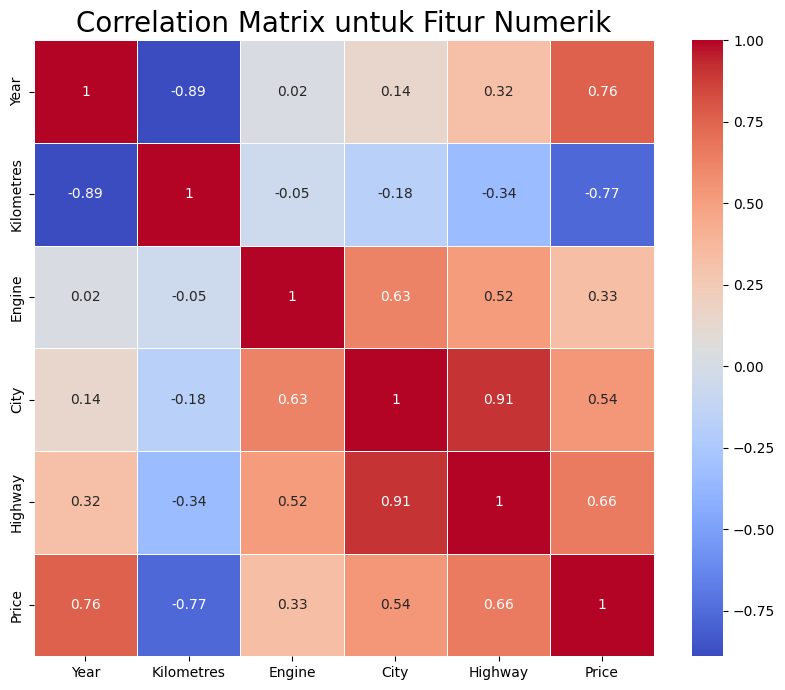

In [30]:
numerical_features = [col for col in numerical_features if col in cars.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = cars[numerical_features].corr(method='spearman').round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

#Data Preparation

##Encode Fitur Kategori

In [31]:
from sklearn.preprocessing import  OneHotEncoder
cars = pd.concat([cars, pd.get_dummies(cars['Make'], prefix='Make')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Model'], prefix='Model')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Body_Type'], prefix='Body_Type')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Transmission'], prefix='Transmission')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Drivetrain'], prefix='Drivetrain')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Exterior_Colour'], prefix='Exterior_Colour')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Interior_Colour'], prefix='Interior_Colour')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['Fuel_Type'], prefix='Fuel_Type')],axis=1)
cars.drop(['Make', 'Model', 'Body_Type', 'Transmission', 'Drivetrain', 'Exterior_Colour', 'Interior_Colour', 'Fuel_Type'], axis=1, inplace=True)

cars.head()

,Year,Kilometres,Engine,City,Highway,Price,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Interior_Colour_White,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Flexible,Fuel_Type_Gas,Fuel_Type_Gas/Electric Hybrid,Fuel_Type_Gaseous Fuel Compatible,Fuel_Type_Gasoline Fuel,Fuel_Type_Gasoline Hybrid,Fuel_Type_Other
586,2019,33032,4,11.0,8.6,40888,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
587,2020,50702,4,11.0,8.6,44599,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
588,2021,67950,4,11.3,9.1,46989,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
590,2020,27800,4,11.3,9.1,49099,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
591,2019,34396,6,11.4,7.7,36499,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


##PCA

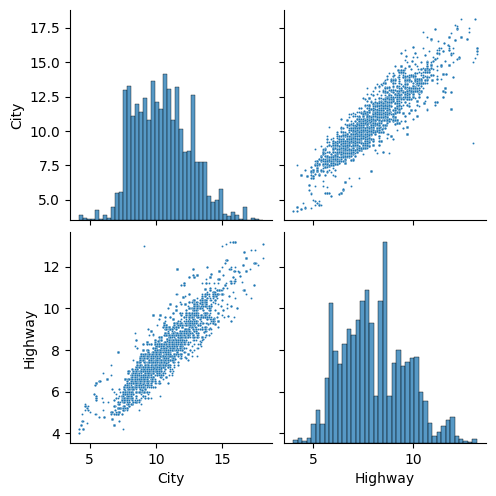

In [32]:
sns.pairplot(cars[['City','Highway']], plot_kws={"s": 2});

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(cars[['City','Highway']])
princ_comp = pca.transform(cars[['City','Highway']])

In [34]:
pca.explained_variance_ratio_.round(2)

array([0.95, 0.05])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(cars[['City','Highway']])
cars['Efficiency'] = pca.transform(cars.loc[:, ('City','Highway')]).flatten()
cars.drop(['City','Highway'], axis=1, inplace=True)

In [36]:
cars.head()

,Year,Kilometres,Engine,Price,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Flexible,Fuel_Type_Gas,Fuel_Type_Gas/Electric Hybrid,Fuel_Type_Gaseous Fuel Compatible,Fuel_Type_Gasoline Fuel,Fuel_Type_Gasoline Hybrid,Fuel_Type_Other,Efficiency
586,2019,33032,4,40888,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0.730224
587,2020,50702,4,44599,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0.730224
588,2021,67950,4,46989,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1.269050
590,2020,27800,4,49099,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1.269050
591,2019,34396,6,36499,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,0.515316


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = cars.drop(["Price"],axis =1)
y = cars["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [38]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9441
Total # of sample in train dataset: 7552
Total # of sample in test dataset: 1889


## Standarisasi

In [39]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Year', 'Kilometres', 'Efficiency', 'Engine']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Year,Kilometres,Efficiency,Engine
18003,-1.485010,1.120874,1.736189,1.335761
10871,1.228174,-1.099889,1.077325,1.335761
8455,0.022314,0.044776,-1.259734,-0.516036
6606,0.926709,-1.099873,-0.568994,-0.516036
17353,0.323779,-0.464346,-0.182760,-0.516036


In [40]:
X_train[numerical_features].describe().round(3)

,Year,Kilometres,Efficiency,Engine
count,7552.000,7552.000,7552.000,7552.000
mean,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000
min,-2.691,-1.100,-2.874,-1.442
25%,-0.581,-0.984,-0.753,-0.516
50%,0.022,-0.149,-0.061,-0.516
75%,0.927,0.635,0.729,1.336
max,1.228,3.134,3.498,3.188


# Model Development

In [41]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## KNN Model

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest Model

In [43]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Ada Boosting Model


In [44]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=250,
                             learning_rate=0.01,
                             random_state=50)

boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi

In [45]:
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,Year,Kilometres,Efficiency,Engine
10542,0.926709,-1.099889,1.115134,1.335761
3027,-1.485010,1.104664,-1.488623,-0.516036
12981,-1.786475,1.425021,-0.028470,1.335761
4395,1.228174,-1.098268,-0.859599,-0.516036
7033,1.228174,-1.099290,1.414726,1.335761


In [46]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,32852.48315,40236.499284
RF,19442.798518,31629.554242
Boosting,98725.306027,98770.904533


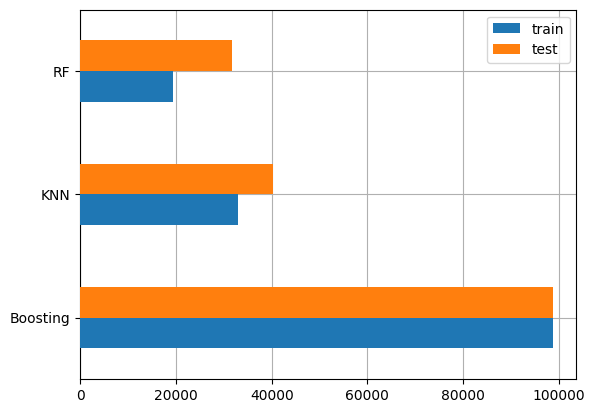

In [47]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
10542,49270,48987.8,49843.4,68283.4
3027,8995,8427.8,11631.2,13062.2
12981,12990,14082.5,10925.1,13103.4
4395,37074,33002.0,35054.1,41705.3
7033,79522,70227.0,72191.2,68374.8
11181,48602,37261.8,45150.8,44500.3
1754,36999,25852.5,21293.4,23239.4
2596,18495,19996.0,18347.3,17777.2
9949,50988,45550.4,46956.4,56783.8
6337,17499,18293.3,21116.3,21253.1


In [49]:
gridtuning = pd.DataFrame(index=['KNN', 'RF', 'Adaboost'], columns=['train_mse', 'test_mse'])

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn = KNeighborsRegressor()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

gridtuning.loc['KNN', 'train_mse'] = mean_squared_error(y_pred=grid_search_knn.predict(X_train), y_true=y_train)
gridtuning.loc['KNN', 'test_mse'] = mean_squared_error(y_pred=grid_search_knn.predict(X_test), y_true=y_test)

In [51]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=35, n_jobs=-1)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

gridtuning.loc['RF', 'train_mse'] = mean_squared_error(y_pred=grid_search_rf.predict(X_train), y_true=y_train)
gridtuning.loc['RF', 'test_mse'] = mean_squared_error(y_pred=grid_search_rf.predict(X_test), y_true=y_test)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [52]:
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada = AdaBoostRegressor(random_state=42)

grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

gridtuning.loc['Adaboost', 'train_mse'] = mean_squared_error(y_pred=grid_search_ada.predict(X_train), y_true=y_train)
gridtuning.loc['Adaboost', 'test_mse'] = mean_squared_error(y_pred=grid_search_ada.predict(X_test), y_true=y_test)

In [53]:
gridtuning

,train_mse,test_mse
KNN,22158644.748406,37032832.319238
RF,4076945.907819,22735601.096978
Adaboost,91943161.757475,97181133.348437


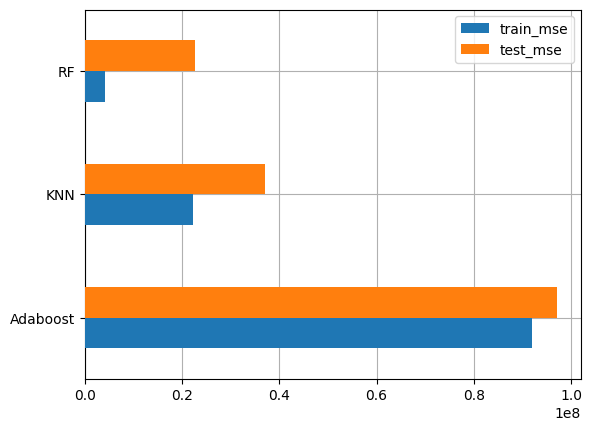

In [54]:
fig, ax = plt.subplots()
gridtuning.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [55]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
10542,49270,48987.8,49843.4,68283.4
3027,8995,8427.8,11631.2,13062.2
12981,12990,14082.5,10925.1,13103.4
4395,37074,33002.0,35054.1,41705.3
7033,79522,70227.0,72191.2,68374.8
11181,48602,37261.8,45150.8,44500.3
1754,36999,25852.5,21293.4,23239.4
2596,18495,19996.0,18347.3,17777.2
9949,50988,45550.4,46956.4,56783.8
6337,17499,18293.3,21116.3,21253.1
